In [1]:
!pip install git+https://github.com/pytube/pytube --upgrade

  Cloning https://github.com/pytube/pytube to /tmp/pip-req-build-yohgd8hh
  Running command git clone --filter=blob:none -q https://github.com/pytube/pytube /tmp/pip-req-build-yohgd8hh
  Resolved https://github.com/pytube/pytube to commit 84faec34c8a66f502ac635a5610445dbff160654
  Preparing metadata (setup.py) ... done


In [2]:
from pytube import YouTube
# misc
import os
import shutil
import math
import datetime
# plots
import matplotlib.pyplot as plt
%matplotlib inline
# image operation
import cv2

In [3]:
# from pytube import YouTube
# YouTube('https://youtu.be/2lAe1cqCOXo').streams.first().download()
# yt = YouTube('http://youtube.com/watch?v=2lAe1cqCOXo')
# yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first().download()

In [4]:
# thanks to the Medium article 
# https://towardsdatascience.com/the-easiest-way-to-download-youtube-videos-using-python-2640958318ab
video = YouTube('https://www.youtube.com/watch?v=OHl_0s4qqUY&ab_channel=umnSAFL')

In [5]:
video.streams.filter(file_extension = "mp4").all()

/tmp/ipykernel_1094959/1617560693.py:1: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  video.streams.filter(file_extension = "mp4").all()


[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">,
 <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">,
 <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d" progressive="False" type="video">,
 <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">,
 <Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">,
 <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">]

In [6]:
video.streams.get_by_itag(135).download()

'/home/user/Documents/repos/openpiv-python-examples/notebooks/Super-Large-Scale Flow Visualization with Snow.mp4'

In [12]:
class FrameExtractor():
    '''
    Class used for extracting frames from a video file.
    '''
    def __init__(self, video_path):
        self.video_path = video_path
        self.vid_cap = cv2.VideoCapture(video_path)
        self.n_frames = int(self.vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        self.fps = int(self.vid_cap.get(cv2.CAP_PROP_FPS))
        
    def get_video_duration(self):
        duration = self.n_frames/self.fps
        print(f'Duration: {datetime.timedelta(seconds=duration)}')
        
    def get_n_images(self, every_x_frame):
        n_images = math.floor(self.n_frames / every_x_frame) + 1
        print(f'Extracting every {every_x_frame} (nd/rd/th) frame would result in {n_images} images.')
        
    def extract_frames(self, every_x_frame, img_name, dest_path=None, img_ext = '.jpg'):
        if not self.vid_cap.isOpened():
            self.vid_cap = cv2.VideoCapture(self.video_path)
        
        if dest_path is None:
            dest_path = os.getcwd()
        else:
            if not os.path.isdir(dest_path):
                os.mkdir(dest_path)
                print(f'Created the following directory: {dest_path}')
        
        frame_cnt = 0
        img_cnt = 0

        while self.vid_cap.isOpened():
            
            success,image = self.vid_cap.read() 
            
            if not success:
                break
            
            if frame_cnt % every_x_frame == 0:
                img_path = os.path.join(dest_path, ''.join([img_name, '_', str(img_cnt), img_ext]))
                cv2.imwrite(img_path, image)  
                img_cnt += 1
                
            frame_cnt += 1
        
        self.vid_cap.release()
        # cv2.destroyAllWindows()

In [13]:
fe = FrameExtractor('/home/user/Documents/repos/openpiv-python-examples/notebooks/Super-Large-Scale Flow Visualization with Snow.mp4')

In [14]:
fe.get_video_duration()


Duration: 0:01:01.034483


In [15]:
fe.get_n_images(every_x_frame=4)

Extracting every 4 (nd/rd/th) frame would result in 443 images.


In [16]:
fe.extract_frames(every_x_frame=4, 
                  img_name='test', 
                  dest_path='test_images')

In [17]:
import os, glob, re

image_list = glob.glob('./test_images/test_*.jpg')
image_list.sort(key=lambda x:float(re.findall("(\d+)",x)[0]))
# print(image_list)

<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
/tmp/ipykernel_1094959/1826304048.py:4: DeprecationWarning: invalid escape sequence \d
  image_list.sort(key=lambda x:float(re.findall("(\d+)",x)[0]))


/tmp/ipykernel_1094959/2634827664.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(image_list[130]))


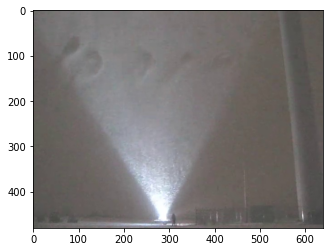

In [18]:
import matplotlib.pyplot as plt
import imageio
from openpiv.piv import simple_piv

plt.imshow(imageio.imread(image_list[130]))

/tmp/ipykernel_1094959/4170835258.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = rgb2gray(imageio.imread(image_list[i]))
/tmp/ipykernel_1094959/4170835258.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  b = rgb2gray(imageio.imread(image_list[i+1]))


130


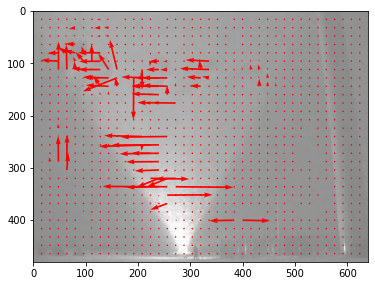

131


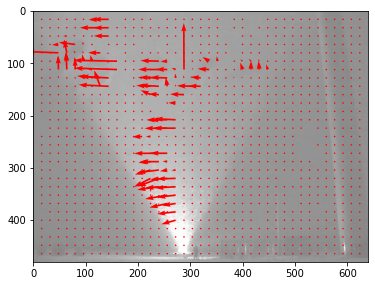

132


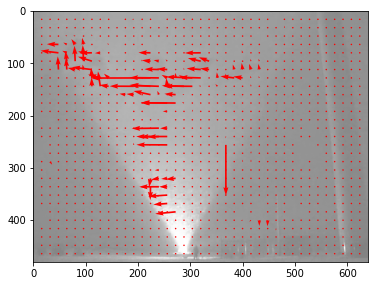

133


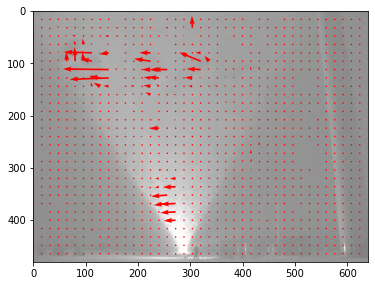

In [19]:
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for i in range(130, 134, 1):
    print(i)
    a = rgb2gray(imageio.imread(image_list[i]))
    b = rgb2gray(imageio.imread(image_list[i+1]))
    # plt.figure()
    # plt.imshow(np.sum(a,axis=2),cmap='gray')
    # plt.figure()
    # plt.imshow(np.sum(b,axis=2),cmap='gray')
    simple_piv(a, b)

In [20]:
import shutil
shutil.rmtree('./test_images')